# Home Credit Default Risk - Exploration + Baseline Model

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders. Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities. 

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

This is a simple notebook on exploration and baseline model of home credit default risk data 

**Contents**   
1. Dataset Preparation    
2. Exploration - Applications Train  
&nbsp;&nbsp;&nbsp;&nbsp; 2.1 Snapshot - Application Train    
&nbsp;&nbsp;&nbsp;&nbsp; 2.2 Distribution of Target Variable    
&nbsp;&nbsp;&nbsp;&nbsp; 2.3 Gender and Contract Type Distribution and Target Variable    
&nbsp;&nbsp;&nbsp;&nbsp; 2.4 Own Realty and Own Car  - Distribution with Target Variable  
&nbsp;&nbsp;&nbsp;&nbsp; 2.5 Suit Type and Income Type    
&nbsp;&nbsp;&nbsp;&nbsp; 2.6 Family Statue and Housing Type   
&nbsp;&nbsp;&nbsp;&nbsp; 2.7 Education Type and Income Type   
&nbsp;&nbsp;&nbsp;&nbsp; 2.8.1 Organization Type and Occupation Type   
&nbsp;&nbsp;&nbsp;&nbsp; 2.8.2 Walls Material, Foundation and House Type   
&nbsp;&nbsp;&nbsp;&nbsp; 2.9 Amount Credit Distribution    
&nbsp;&nbsp;&nbsp;&nbsp; 2.10 Amount Annuity Distribution  
&nbsp;&nbsp;&nbsp;&nbsp; 2.11 Amount Goods Price   
&nbsp;&nbsp;&nbsp;&nbsp; 2.12 Amount Region Population Relative    
&nbsp;&nbsp;&nbsp;&nbsp; 2.13 Days Birth   
&nbsp;&nbsp;&nbsp;&nbsp; 2.14 Days Employed    
&nbsp;&nbsp;&nbsp;&nbsp; 2.15 Num Days Registration  
&nbsp;&nbsp;&nbsp;&nbsp; 2.15 Count of Family Members  
3. Exploration - Bureau Data  
&nbsp;&nbsp;&nbsp;&nbsp; 3.1 Snapshot - Bureau Data    
4. Exploration - Bureau Balance Data  
&nbsp;&nbsp;&nbsp;&nbsp; 4.1 Snapshot - Bureau Balance Data     
5. Exploration - Credit Card Balance Data   
&nbsp;&nbsp;&nbsp;&nbsp; 5.1 Snapshot - Credit Card Balance Data   
6. Exploration - POS Cash Balance Data   
&nbsp;&nbsp;&nbsp;&nbsp; 6.1 Snapshot - POS Cash Balance Data   
7. Exploration - Previous Application Data   
&nbsp;&nbsp;&nbsp;&nbsp; 7.1 Snapshot - Previous Application Data  
&nbsp;&nbsp;&nbsp;&nbsp; 7.2 Contract Status Distribution - Previous Applications  
&nbsp;&nbsp;&nbsp;&nbsp; 7.3 Suite Type Distribution - Previous Application    
&nbsp;&nbsp;&nbsp;&nbsp; 7.4 Client Type Distribution  - Previous Application    
&nbsp;&nbsp;&nbsp;&nbsp; 7.5 Channel Type Distribution - Previous Applications  
7. Exploration - Installation Payments  
&nbsp;&nbsp;&nbsp;&nbsp; 8.1 Snapshot of Installation Payments  
9. Baseline Model  
&nbsp;&nbsp;&nbsp;&nbsp; 9.1 Dataset Preparation  
&nbsp;&nbsp;&nbsp;&nbsp; 9.2 Label Encoding     
&nbsp;&nbsp;&nbsp;&nbsp; 9.3 Validation Sets Preparation    
&nbsp;&nbsp;&nbsp;&nbsp; 9.4 Model Fitting    
&nbsp;&nbsp;&nbsp;&nbsp; 9.5 Feature Importance    
&nbsp;&nbsp;&nbsp;&nbsp; 9.6 Prediction 



## 1. Dataset Preparation 

In [1]:
from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly import tools
from datetime import date
import pandas as pd
import numpy as np 
import seaborn as sns
import random 
import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

path = "Data/"

def bar_hor(df, col, title, color, w=None, h=None, lm=0, limit=100, return_trace=False, rev=False, xlb = False):
    cnt_srs = df[col].value_counts()
    yy = cnt_srs.head(limit).index[::-1] 
    xx = cnt_srs.head(limit).values[::-1] 
    if rev:
        yy = cnt_srs.tail(limit).index[::-1] 
        xx = cnt_srs.tail(limit).values[::-1] 
    if xlb:
        trace = go.Bar(y=xlb, x=xx, orientation = 'h', marker=dict(color=color))
    else:
        trace = go.Bar(y=yy, x=xx, orientation = 'h', marker=dict(color=color))
    if return_trace:
        return trace 
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

def bar_hor_noagg(x, y, title, color, w=None, h=None, lm=0, limit=100, rt=False):
    trace = go.Bar(y=x, x=y, orientation = 'h', marker=dict(color=color))
    if rt:
        return trace
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)


def bar_ver_noagg(x, y, title, color, w=None, h=None, lm=0, rt = False):
    trace = go.Bar(y=y, x=x, marker=dict(color=color))
    if rt:
        return trace
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)
    
def gp(col, title):
    df1 = app_train[app_train["TARGET"] == 1]
    df0 = app_train[app_train["TARGET"] == 0]
    a1 = df1[col].value_counts()
    b1 = df0[col].value_counts()

    trace1 = go.Bar(x=a1.index, y=a1.values, name='Target : 1', marker=dict(color="#44ff54"))
    trace2 = go.Bar(x=b1.index, y=b1.values, name='Target : 0', marker=dict(color="#ff4444"))

    data = [trace1, trace2]
    layout = go.Layout(barmode='group', height=300, title = title)

    fig = go.Figure(data=data, layout=layout)
    iplot(fig, filename='grouped-bar')

## 2. Exploration of - Application 

## 2.1 Snapshot of Application Train

Application data consists of static data for all applications and every row represents one loan.

In [2]:
app_train = pd.read_csv(path + "application_train.csv")
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


> There is the information about a total of 307,511 loans and a total of 122 columns. 

## 2.2 Distribution of Target Variable 

In [3]:
# Target Variable Distribution 
bar_hor(app_train, "TARGET", "Distribution of Target Variable" , ["#44ff54", '#ff4444'], h=400, w=800, lm=100, xlb = ['Target : 1','Target : 0'])

> - The target variable consists of about 282K (85%) loans having target variable = 0 while only 24K rows are there having target = 1. 

## 2.3 Which Gender and Contract Type applies for loan

### 2.3.1 Distirbution of Gender and Contract

In [4]:
tr1 = bar_hor(app_train, "CODE_GENDER", "Distribution of CODE_GENDER Variable" ,"#639af2", w=700, lm=100, return_trace= True)
tr2 = bar_hor(app_train, "NAME_CONTRACT_TYPE", "Distribution of NAME_CONTRACT_TYPE Variable" ,"#a4c5f9", w=700, lm=100, return_trace = True)

fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['Gender' , 'Contract Type'])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
fig['layout'].update(height=400, showlegend=False, margin=dict(b=100));
iplot(fig);

> Gender wise, Females has applied for a larger number of lonas (202448) as compared to males (105059). Cash loans with about 278K loans contributes to a majorty of total lonas in this dataset. Revolving loans has significantly lesser number equal to about 29K as compared to Cash loans. 

### 2.3.2 How does Target with Gender and Contract Type 

In [5]:
gp('CODE_GENDER', 'Distribution of Target with Gender')
gp('NAME_CONTRACT_TYPE', 'Distribution of Target with Contract Type')

## 2.4. Own Realty and Own Car

In [6]:
#tr1 = bar_hor(app_train, "FLAG_OWN_REALTY", "Distribution of FLAG_OWN_REALTY" ,"#639af2", w=700, lm=100, return_trace= True)
#tr2 = bar_hor(app_train, "FLAG_OWN_CAR", "Distribution of FLAG_OWN_CAR" ,"#639af2", w=700, lm=100, return_trace = True)
#gp('FLAG_OWN_REALTY', 'Distribution of Target with Gender')
#gp('FLAG_OWN_CAR', 'Distribution of Target with Contract Type')
#fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['Own Realty' , 'Own CAR'])
#fig.append_trace(tr1, 1, 1);
#fig.append_trace(tr2, 1, 2);
#fig['layout'].update(height=400, showlegend=False, margin=dict(b=100));
#iplot(fig);


tr1 = bar_hor(app_train, "FLAG_OWN_REALTY", "Distribution of FLAG_OWN_REALTY" ,"#639af2", w=700, lm=100, return_trace= True)
tr2 = bar_hor(app_train, "FLAG_OWN_CAR", "Distribution of FLAG_OWN_CAR" ,"#639af2", w=700, lm=100, return_trace = True)

fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['Own Realty' , 'Own CAR'])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
fig['layout'].update(height=400, showlegend=False, margin=dict(b=100));
iplot(fig);

## 2.5 Suite Type and Income Type of Applicants 

### 2.5.1 What are the Suite Type and Income Types 

In [7]:
tr1 = bar_hor(app_train, "NAME_TYPE_SUITE", "Distribution of NAME_TYPE_SUITE" ,"#639af2", w=700, lm=100, return_trace= True)
tr2 = bar_hor(app_train, "NAME_INCOME_TYPE", "Distribution of NAME_INCOME_TYPE" ,"#a4c5f9", w=700, lm=100, return_trace = True)

fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['Applicants Suite Type' , 'Applicants Income Type'])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
fig['layout'].update(height=400, showlegend=False, margin=dict(l=100));
iplot(fig);

> Top 3 Type Suites which applies for loan are the houses which are unaccompanined with close to 250K applications, followed by Family and Spouse related families  
> The income type of people who applies for loan include about 8 categroes, top ones are : 
    - Working Class (158K)
    - Commercial Associate (71K)
    - Pensiner (55K)

### 2.5.2 How does Target Varies with Suite and Income Type of Applicants 

In [8]:
gp('NAME_TYPE_SUITE', 'Target with respect to Suite Type of Applicants')
gp('NAME_INCOME_TYPE', 'Target with respect to Income Type of Applicants')

## 2.6. Family Status and Housing Types

### 2.6.1 What are the values of Family Status and Housing Types of Applicants 

In [9]:
tr1 = bar_hor(app_train, "NAME_FAMILY_STATUS", "Distribution of NAME_FAMILY_STATUS" ,"#639af2", w=700, lm=100, return_trace= True)
tr2 = bar_hor(app_train, "NAME_HOUSING_TYPE", "Distribution of NAME_HOUSING_TYPE" ,"#a4c5f9", w=700, lm=100, return_trace = True)

fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['NAME_FAMILY_STATUS' , 'NAME_HOUSING_TYPE'])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
fig['layout'].update(height=400, showlegend=False, margin=dict(l=100));
iplot(fig);

> - It is observed that married people have applied for maximum number of applications equal to 196K followed by Singles. Key Housign Types include : House / Apartment which contributes to almost 85% of all the applications, people living with parents and municipal apartments. 

### 2.6.2 How does Target Varies with Family Status and Housing Type

In [10]:
gp('NAME_FAMILY_STATUS', 'Target and Family Status')
gp('NAME_HOUSING_TYPE', 'Target and Housing Type')

## 2.7. Education Type and Income Type 

### 2.7.1 The distribution of Education Type and Income Type in the dataset 

In [11]:
tr1 = bar_hor(app_train, "NAME_EDUCATION_TYPE", "Distribution of NAME_EDUCATION_TYPE" ,"#639af2", w=700, lm=100, return_trace= True)
# tr2 = bar_hor(app_train, "NAME_INCOME_TYPE", "Distribution of NAME_FAMILY_STATUS" ,"#a4c5f9", w=700, lm=100, return_trace = True)

fig = tools.make_subplots(rows=1, cols=1, print_grid=False, subplot_titles = ['NAME_EDUCATION_TYPE' ])
fig.append_trace(tr1, 1, 1);
# fig.append_trace(tr2, 1, 2);
fig['layout'].update(height=400, showlegend=False, margin=dict(l=100));
iplot(fig);

> A large number of applications (218K) are filed by people having secondaty education followed by people with Higher Education with 75K applications.  

### 2.7.2 The distribution of Target Variable with Education Type and Income Type in the dataset 

In [12]:
gp('NAME_EDUCATION_TYPE', 'Education Type and Target')

## 2.8. Which ORGANIZATION_TYPE and OCCUPATION_TYPE applies for the loan

### 2.8.1 The distribution of Organization and Occupation Type in the dataset 

In [13]:
tr1 = bar_hor(app_train, "ORGANIZATION_TYPE", "Distribution of ORGANIZATION_TYPE" ,"#639af2", w=700, lm=100, return_trace= True)
tr2 = bar_hor(app_train, "OCCUPATION_TYPE", "Distribution of OCCUPATION_TYPE" ,"#a4c5f9", w=700, lm=100, return_trace = True)

fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['ORGANIZATION_TYPE' , 'OCCUPATION_TYPE'])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
fig['layout'].update(height=600, showlegend=False, margin=dict(l=200));
iplot(fig);

> Top Applicant's who applied for loan : Laborers - Approx 55 K, Sales Staff - Approx 32 K, Core staff - Approx 28 K. Entity Type 3 type organizations have filed maximum number of loans equal to approx 67K

### 2.8.2 Target Variable with respect to Organization and Occupation Type 

In [14]:
gp('ORGANIZATION_TYPE', 'Organization Type and Target')
gp('OCCUPATION_TYPE', 'Occupation Type and Target')

### 2.8.3. Walls Material, Foundation, and House Type Distribution

In [15]:
tr2 = bar_hor(app_train, "WALLSMATERIAL_MODE", "Distribution of FLAG_OWN_CAR" ,"#a4c5f9", w=700, lm=100, return_trace = True)
tr1 = bar_hor(app_train, "FONDKAPREMONT_MODE", "Distribution of FLAG_OWN_REALTY" ,"#639af2", w=700, lm=100, return_trace= True)
tr3 = bar_hor(app_train, "HOUSETYPE_MODE", "Distribution of FLAG_OWN_CAR" ,"#a4c5f9", w=700, lm=100, return_trace = True)

fig = tools.make_subplots(rows=1, cols=3, print_grid=False, subplot_titles = ['WALLSMATERIAL_MODE' , 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE'])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
fig.append_trace(tr3, 1, 3);

fig['layout'].update(height=400, showlegend=False, margin=dict(l=100));
iplot(fig);

> - "Blocks and Flats" related house types have filed the largest number of loan applications equal to about 150K, rest of the other categories : Specific Housing and Terraced house have less than 1500 applications. Similarly houses having Panel and Stone Brick type foundations have filed the largest applciations close to 120K combined. 

### 2.8.4 Target Variable with respect to Walls Material, Fondkappremont, House Type 

In [16]:
gp('WALLSMATERIAL_MODE', 'Wall Material and Target')
gp('FONDKAPREMONT_MODE', 'Foundation and Target')
gp('HOUSETYPE_MODE', 'House Type and Target')

## 2.9. Distribution of Amount Credit 

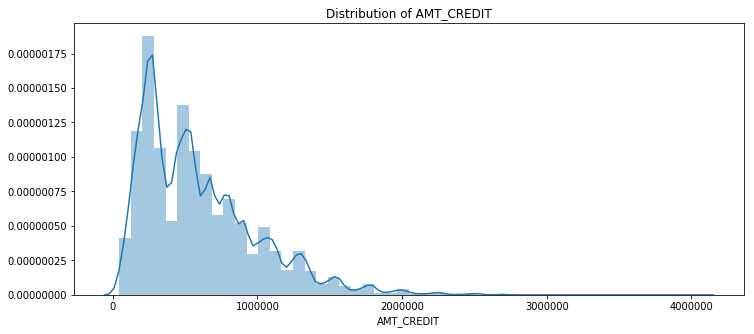

In [17]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(app_train["AMT_CREDIT"])

## 2.10 Distribution of Amount AMT_ANNUITY 

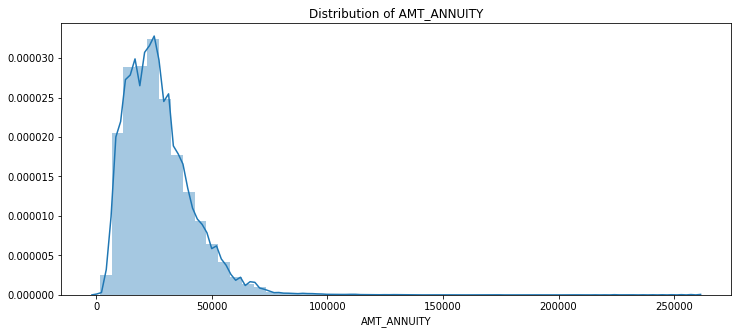

In [18]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_ANNUITY")
ax = sns.distplot(app_train["AMT_ANNUITY"].dropna())

## 2.11 Distribution of Amount AMT_GOODS_PRICE 

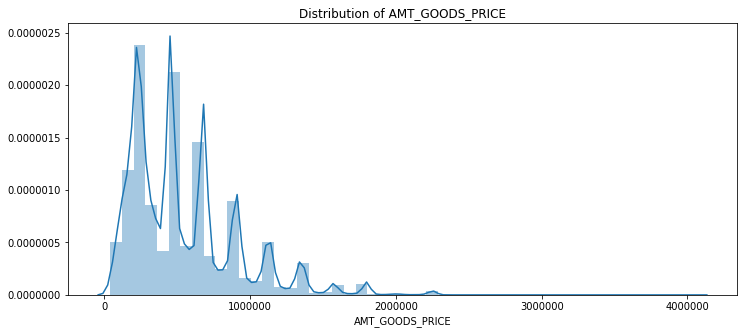

In [19]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_GOODS_PRICE")
ax = sns.distplot(app_train["AMT_GOODS_PRICE"].dropna())
# ax = sns.distplot(app_train["CNT_CHILDREN"], kde = False)

## 2.12 Distribution of Amount REGION_POPULATION_RELATIVE 

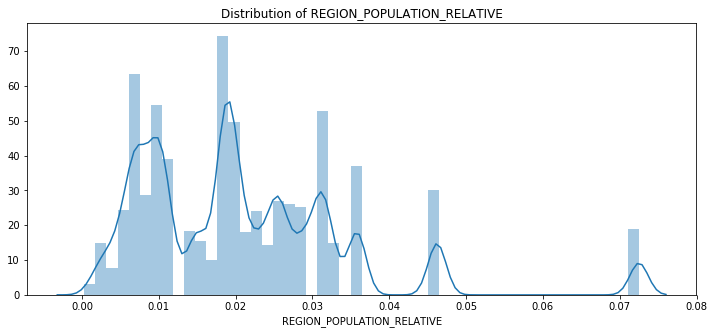

In [20]:
plt.figure(figsize=(12,5))
plt.title("Distribution of REGION_POPULATION_RELATIVE")
ax = sns.distplot(app_train["REGION_POPULATION_RELATIVE"])

## 2.13 Distribution of Amount DAYS_BIRTH 

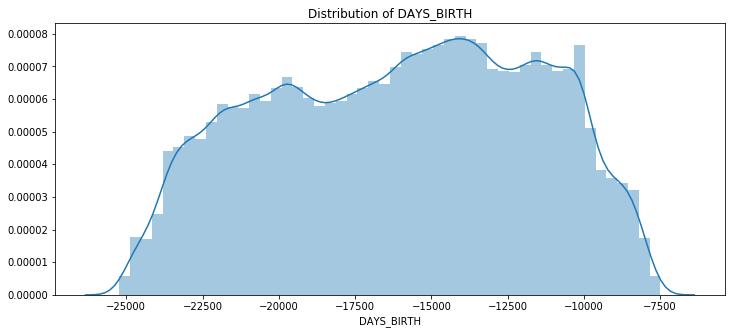

In [21]:
plt.figure(figsize=(12,5))
plt.title("Distribution of DAYS_BIRTH")
ax = sns.distplot(app_train["DAYS_BIRTH"])

## 2.14 Distribution of Amount DAYS_EMPLOYED 

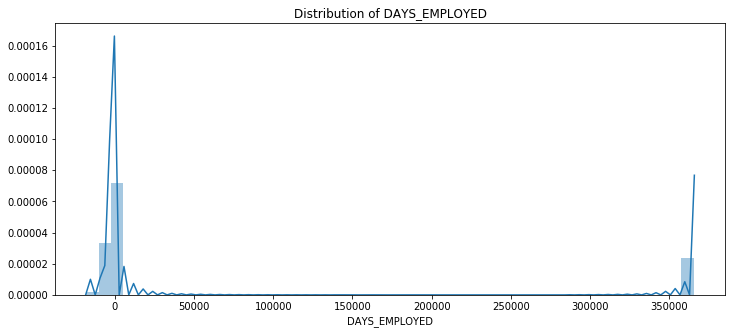

In [22]:
plt.figure(figsize=(12,5))
plt.title("Distribution of DAYS_EMPLOYED")
ax = sns.distplot(app_train["DAYS_EMPLOYED"])

## 2.15 Distribution of Number of Days for Registration

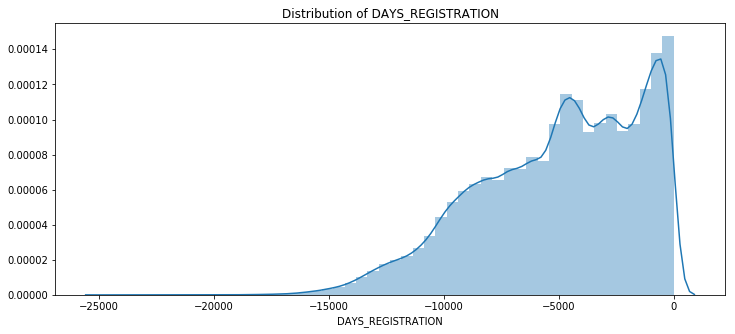

In [23]:
plt.figure(figsize=(12,5))
plt.title("Distribution of DAYS_REGISTRATION")
ax = sns.distplot(app_train["DAYS_REGISTRATION"])

## 2.16 How many Family Members does the applicants has 

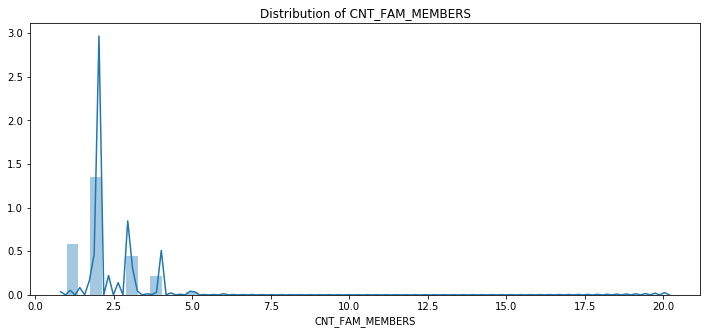

In [24]:
plt.figure(figsize=(12,5))
plt.title("Distribution of CNT_FAM_MEMBERS")
ax = sns.distplot(app_train["CNT_FAM_MEMBERS"].dropna())

## 3. Exploration of Bureau Data

All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample). For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

## 3.1 Snapshot of Bureau Data

In [25]:
bureau = pd.read_csv(path + "bureau.csv")
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


## 4. Exploration of Bureau Balance Data

Monthly balances of previous credits in Credit Bureau. This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

## 4.1 Snapshot of Bureau Balance Data

In [26]:
bureau_balance = pd.read_csv(path + "bureau_balance.csv")
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


## 5. Exploration of Credit Card Balance

Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

## 5.1 Snapshot of Credit Card Balance

In [27]:
credit_card_balance = pd.read_csv(path + "credit_card_balance.csv")
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


## 6. Exploration of POS CASH Balance Data

Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit. This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

## 6.1 Snapshot of POS CASH Balance Data

In [28]:
pcb = pd.read_csv(path + "POS_CASH_balance.csv")
pcb.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


## 7. Snapshot of Prev Application
## 7.1 Snapshot of Prev Application

In [29]:
previous_application = pd.read_csv(path + "previous_application.csv")
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## 7.2 Contract Status Distribution in Previously Filed Applications

In [30]:
t = previous_application['NAME_CONTRACT_STATUS'].value_counts()
labels = t.index
values = t.values

colors = ['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1']

trace = go.Pie(labels=labels, values=values,
               hoverinfo='', textinfo='',
               textfont=dict(size=12),
               marker=dict(colors=colors,
                           line=dict(color='#fff', width=2)))

layout = go.Layout(title='Name Contract Status in Previous Applications', height=400)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

> - A large number of people (about 62%) had their previous applications approved, while about 19% of them had cancelled and other 17% were resued. 

## 7.3 Suite Type Distribution of Previous Applications

In [31]:
t = previous_application['NAME_TYPE_SUITE'].value_counts()
labels = t.index
values = t.values

colors = ['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1']

trace = go.Pie(labels=labels, values=values,
               hoverinfo='', textinfo='',
               textfont=dict(size=12),
               marker=dict(colors=colors,
                           line=dict(color='#fff', width=2)))

layout = go.Layout(title='Suite Type in Previous Application Distribution', height=400)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

> - A majority of applicants had previous applications having Unaccompanied Suite Type (about 60%) followed by Family related suite type (about 25%)

## 7.4 Client Type of Previous Applications

In [32]:
t = previous_application['NAME_CLIENT_TYPE'].value_counts()
labels = t.index
values = t.values

colors = ['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1']

trace = go.Pie(labels=labels, values=values,
               hoverinfo='', textinfo='',
               textfont=dict(size=12),
               marker=dict(colors=colors,
                           line=dict(color='#fff', width=2)))

layout = go.Layout(title='Client Type in Previous Applications', height=400)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

> - About 74% of the previous applications were Repeater Clients, while only 18% are new. About 8% are refreshed. 

## 7.5 Channel Type - Previous Applications 

In [33]:
t = previous_application['CHANNEL_TYPE'].value_counts()
labels = t.index
values = t.values

colors = ['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1']

trace = go.Pie(labels=labels, values=values,
               hoverinfo='', textinfo='',
               textfont=dict(size=12),
               marker=dict(colors=colors,
                           line=dict(color='#fff', width=2)))

layout = go.Layout(title='Channel Type in Previous Applications', height=400)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

## 8. Exploration of Installation Payments 
## 8.1 Snapshot of Installation Payments 

In [34]:
installments_payments = pd.read_csv(path + "installments_payments.csv")
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


## 9. Baseline Model 

### 9.1 Dataset Preparation

In [43]:
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

# read the test data 
app_test = pd.read_csv(path + 'application_test.csv')
app_test['is_test'] = 1 
app_test['is_train'] = 0

app_train['is_test'] = 0
app_train['is_train'] = 1


# target variable 
Y = app_train['TARGET']
test_id = app_test['SK_ID_CURR']

train_X = app_train.drop(['TARGET', 'SK_ID_CURR'], axis = 1)
test_X = app_test.drop(['SK_ID_CURR'], axis = 1)

OSError: dlopen(/anaconda3/envs/pythonstudy/lib/python3.5/site-packages/lightgbm/lib_lightgbm.so, 6): Library not loaded: /usr/local/opt/gcc/lib/gcc/7/libgomp.1.dylib
  Referenced from: /anaconda3/envs/pythonstudy/lib/python3.5/site-packages/lightgbm/lib_lightgbm.so
  Reason: image not found

### 9.2 Label Encoding

In [ ]:
cat_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE',
            'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
            'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
            'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


data = pd.concat([train_X, test_X], axis=0)
for c in cat_cols:
    data[c] = LabelEncoder().fit_transform(data[c].astype('str').values)

train_X = data[data['is_train'] == 1]
test_X = data[data['is_test'] == 1]

### 9.3 Prepare Validation Sets

In [ ]:
# prepare training and validation data
x_train, x_val, y_train, y_val = train_test_split(train_X, Y, random_state=18)

lgb_train = lgb.Dataset(data=x_train, label=y_train)
lgb_eval = lgb.Dataset(data=x_val, label=y_val)

### 9.4 Fit the Model

In [ ]:
params = {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'binary', 'metric': 'auc', 'learning_rate': 0.05, 'num_leaves': 32, 'num_iteration': 500, 'verbose': 0 }
model = lgb.train(params, lgb_train, valid_sets=lgb_eval, early_stopping_rounds=100, verbose_eval=10)

### 9.5 Feature Importance 

In [ ]:
lgb.plot_importance(model, figsize=(12, 20));

### 9.6 Predict

In [ ]:
pred = model.predict(test_X)
sub = pd.DataFrame()
sub['SK_ID_CURR'] = test_id
sub['TARGET'] = pred
sub.to_csv("baseline_submission.csv", index=False)
sub.head()

#### In Progress, Stay Tuned for more 